In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:/Dataset/Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.shape

(38765, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\SAYANIK\AppData\Local\Temp\ipykernel_8276\150256929.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


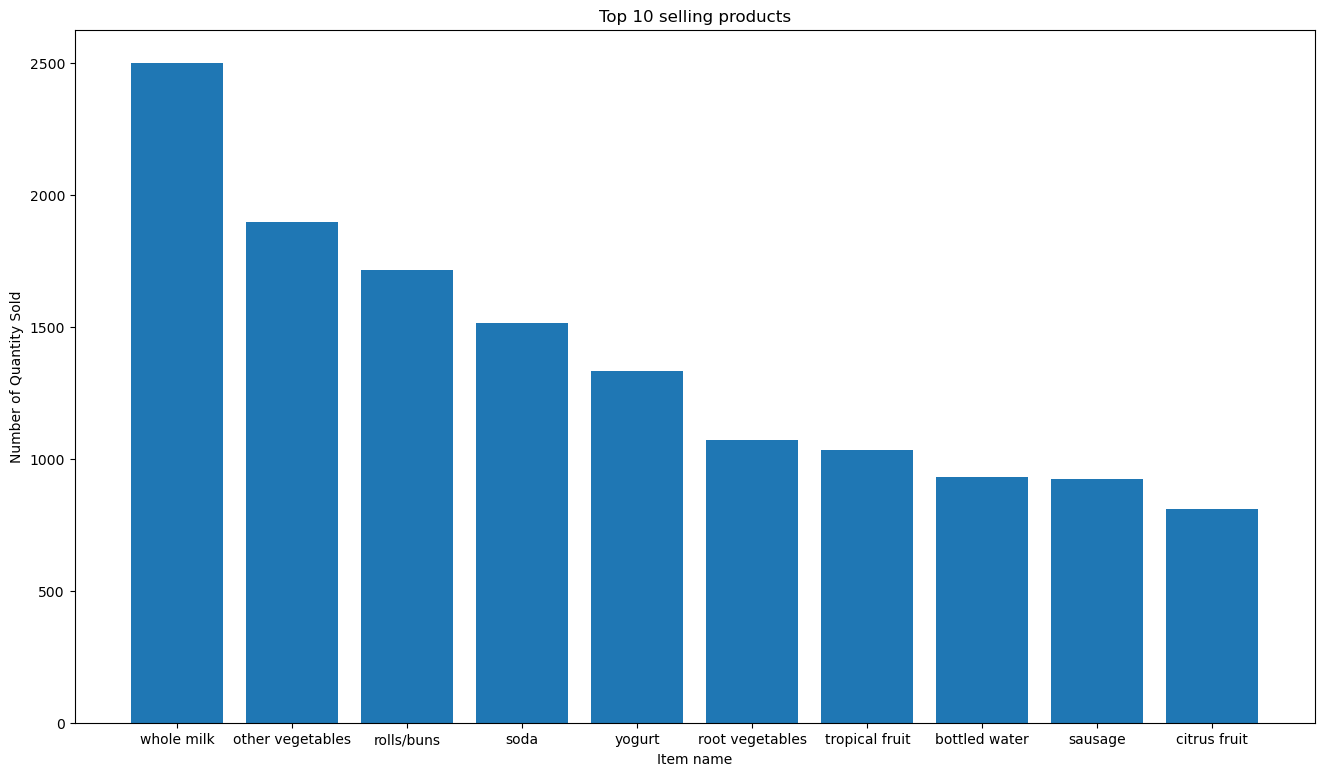

In [7]:
## Item distribution

item_distribution = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)

bars = item_distribution['itemDescription']
height = item_distribution['Frequency']
x_pos = np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos,height)

plt.title("Top 10 selling products")
plt.xlabel("Item name")
plt.ylabel("Number of Quantity Sold")

plt.xticks(x_pos,bars)
plt.show()

In [8]:
# making date as index for plotting purpose

df_date = df.set_index(['Date'])
df_date.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'No of item')]

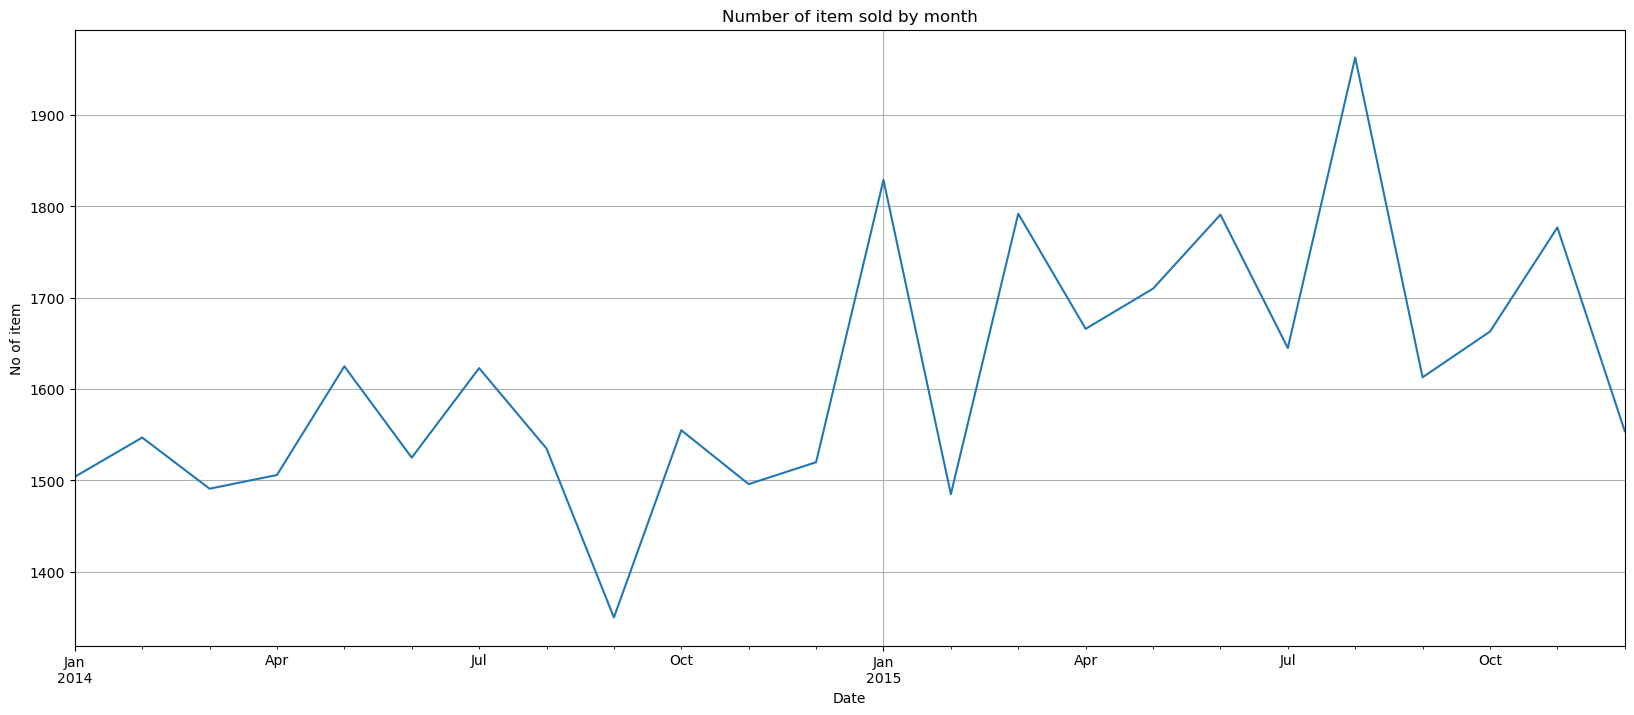

In [9]:
df_date.resample('M')['itemDescription'].count().plot(figsize = (20,8),grid = True, title = "Number of item sold by month").set(xlabel='Date',ylabel='No of item')

In [10]:
## now customer level distribution

cust_level = df[['Member_number','itemDescription']].sort_values(by='Member_number',ascending=False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level.head()

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables


In [59]:
transaction = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

C:\Users\SAYANIK\AppData\Local\Temp\ipykernel_8276\3950800270.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transaction = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]


In [52]:
# pip install mlxtend
#!pip install apyori

In [60]:
#from mlxtend.frequent_patterns import apriori, association_rules
from apyori import apriori

In [61]:
rules = apriori(transactions=transaction,min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)

In [62]:
results = list(rules)

In [63]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [64]:
def dataframe(results):
    antecedent = [tuple(result[2][0][0])[0] for result in results]
    consequent = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidence = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(antecedent,consequent,supports,confidence,lifts))

df_latest = pd.DataFrame(dataframe(results),columns=['antecedent','consequent','support','confidence','lift'])

In [66]:
df_latest.nlargest(n=20,columns='lift')

,antecedent,consequent,support,confidence,lift
4915,berries,pip fruit,0.002052,0.105263,14.654135
4914,berries,pip fruit,0.002052,0.105263,12.068111
2674,beef,pork,0.002052,0.242424,11.524021
3573,brown bread,yogurt,0.002052,0.073394,11.443670
4133,long life bakery product,rolls/buns,0.002052,0.148148,11.105413
3290,oil,sausage,0.002052,0.150943,10.322410
2904,brown bread,rolls/buns,0.002309,0.097826,9.533152
5045,meat,whole milk,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,berries,brown bread,0.002309,0.118421,9.232105


### Conclusion

1.It is seen from the analysis that if Berries are purchased then probability of purchasing Pip fruit is 10.5%

2.And the lift is highest which is 14.65. It suggests that it will give boost to the business in a very positive way.